# Data analysis and model training on Kyphosis Dataset.

Kyphosis is an abnormally excessive convex curvature of the spine.

The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery.

Dataset contains 3 inputs and 1 output.


INPUTS: Age: in months Number: the number of vertebrae involved Start: the number of the first (topmost) vertebra operated on.


OUTPUTS: • Kyphosis: a factor with levels "absent" or "present" indicating if a kyphosis (a type of deformation) was present after the operation.


Link to dataset: https://www.kaggle.com/abbasit/kyphosis-dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
data=pd.read_csv("kyphosis.csv")

In [4]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
data['Kyphosis'] = LabelEncoder_y.fit_transform(data['Kyphosis'])

In [8]:
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [9]:
Kyphosis_True = data[data['Kyphosis']==1]

In [10]:
Kyphosis_False = data[data['Kyphosis']==0]

In [11]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(data) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot: >

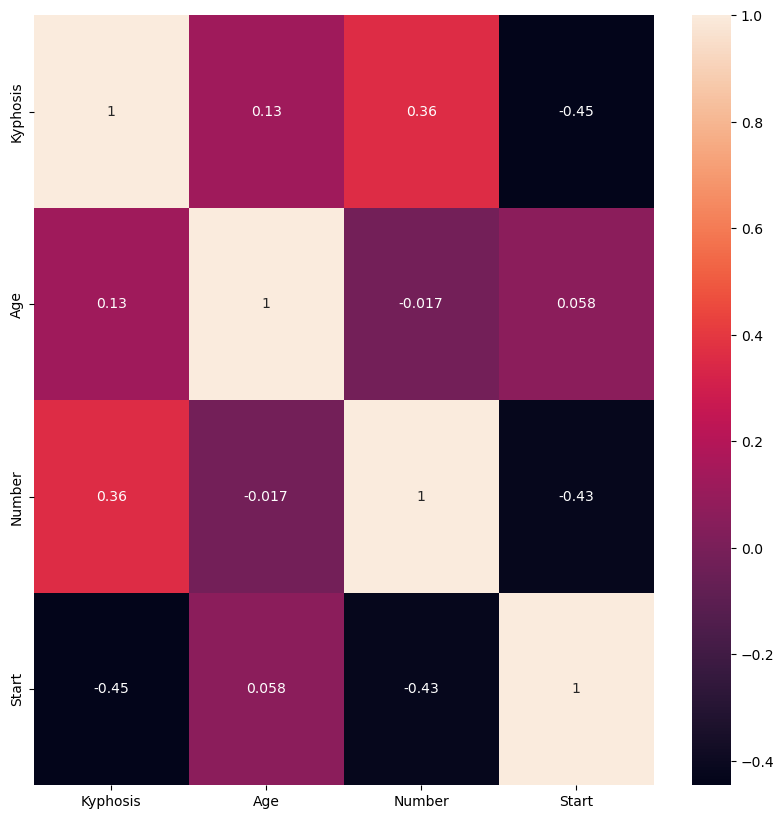

In [12]:
plt.figure(figsize=(10,10)) 
sns.heatmap(data.corr(),annot=True)

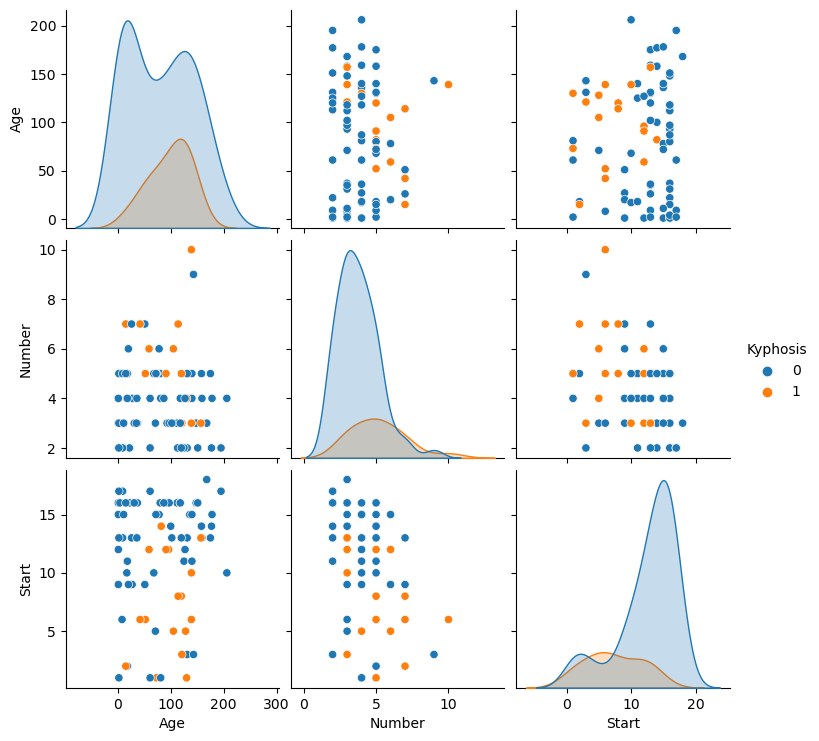

In [13]:
sns.pairplot(data,hue='Kyphosis')

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the data countplot showing how many samples belong to each class**

<AxesSubplot: xlabel='Kyphosis', ylabel='count'>

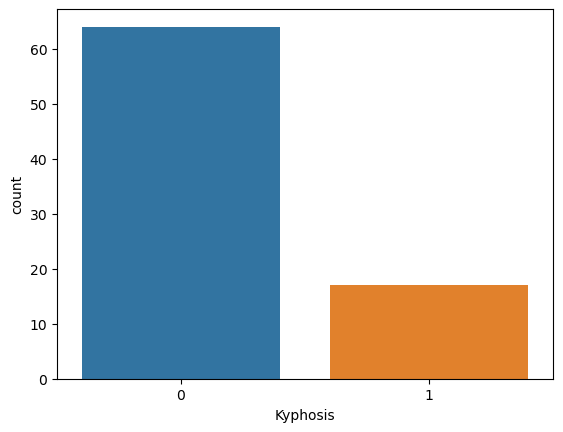

In [14]:
sns.countplot(x=data['Kyphosis'])

In [15]:
# Let's drop the target label coloumns
x=data.drop(['Kyphosis'],axis=1)

In [16]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [17]:
y=data['Kyphosis']
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.3)

In [20]:
X_train.shape

(56, 3)

In [21]:
X_test.shape

(25, 3)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot: >

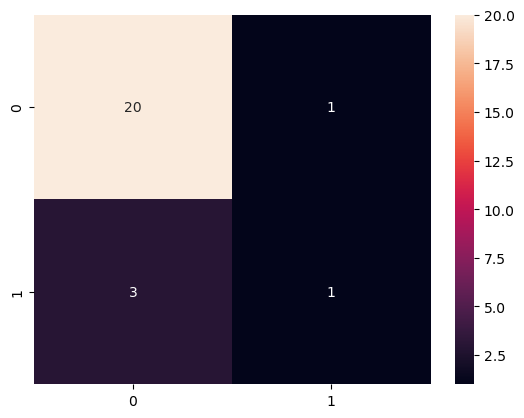

In [31]:
# Predicting the Test set results
from sklearn.linear_model import LogisticRegression

# Example of defining and training a model
model = LogisticRegression()
model.fit(X_train, Y_train)

y_predict_test = model.predict(X_test)
cm= confusion_matrix(Y_test,y_predict_test)
sns.heatmap(cm, annot=True)

In [39]:

print(classification_report(Y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



In [41]:
from sklearn.tree import DecisionTreeClassifier
decision_tree= DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

<AxesSubplot: >

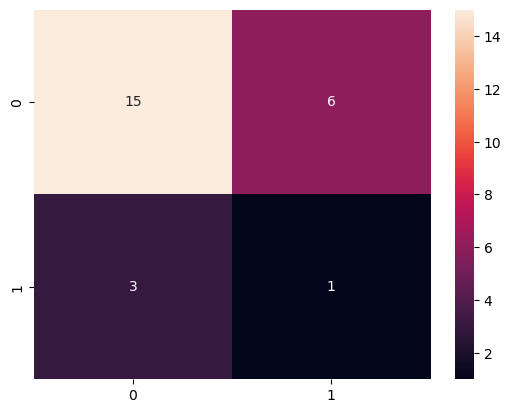

In [42]:
y_predict_test = decision_tree.predict(X_test)
cm= confusion_matrix(Y_test,y_predict_test)
sns.heatmap(cm, annot=True)


In [43]:
print(classification_report(Y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.14      0.25      0.18         4

    accuracy                           0.64        25
   macro avg       0.49      0.48      0.48        25
weighted avg       0.72      0.64      0.68        25




- **Training  a random forest classifier model and assess its performance**



              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25



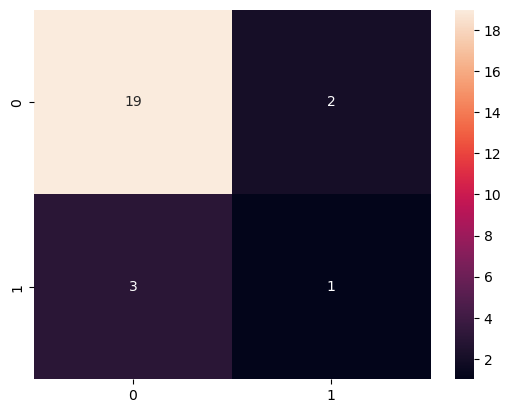

In [50]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, Y_train)

# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(Y_test, y_predict_test))